 <center>    <h1>TUGAS BESAR PENGOLAHAN CITRA DIGITAL</h1>   </center>

<div style="color:black;
           display:fill;
           border-radius:5px;
           font-size:120%;
           font-family:montserrat;
           letter-spacing:0.5px;
           color: white;
           text-align:center;
           padding-bottom:3%;">
</div>

<div style="color:black;
           display:fill;
           border-radius:5px;
           font-size:120%;
           font-family:montserrat;
           #letter-spacing:0.5px;
           color: white;
           text-align:center;">
           <h2> The Group </h2>
           <br> F1D021014 Mei Sukriani |
           F1D021082 Baiq Kaimya Al Saadah Al Gazali |
           F1D021090 Faza Alliya Audristy Putri Ronce |
           F1D021102 Lalu Ramdoni Hidayat |
           F1D021097 Islam Anasta Irawan
</div>

<div style="display:fill;
           border-radius:5px;
           font-family:montserrat;
           letter-spacing:0.5px;
           background-color:skyblue;">

<p style="padding: 10px;
              color:black;
              text-align:center;
              font-size:200%;
              font-weight:800;">
              Klasifikasi Cuaca pada Citra Menggunakan CNN
</p>
</div>

<b>Import library yang diperlukan, seperti Os, TensorFlow, Keras,  PIL (Python Imaging Library), Matplotlib, Skimage.

In [154]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

Modul os memberikan akses ke berbagai fungsi yang berkaitan dengan sistem operasi. Anda dapat menggunakannya untuk melakukan operasi pada path file, seperti membuat direktori, menghapus file, atau memeriksa keberadaan file.

Modul numpy (diimpor sebagai np) menyediakan fungsi-fungsi untuk komputasi numerik. NumPy memungkinkan Anda untuk melakukan operasi matematika dan manipulasi array dengan cepat dan efisien.

Modul PIL (Python Imaging Library) memberikan fungsionalitas untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar. Dalam konteks ini, Anda dapat menggunakan modul Image untuk membaca dan memanipulasi gambar.

train_test_split adalah fungsi yang disediakan oleh pustaka scikit-learn untuk membagi data menjadi subset train dan test. Ini sangat berguna dalam pemodelan dan evaluasi model mesin pembelajaran.

tensorflow adalah pustaka pembelajaran mesin yang populer dan keras adalah API tingkat tinggi yang disediakan oleh TensorFlow untuk membangun dan melatih model neural networks. Dengan mengimpor keras dari tensorflow, Anda dapat menggunakan fungsi-fungsi terkait dengan model neural networks dengan mudah.

layers adalah submodule dalam keras yang menyediakan definisi berbagai jenis layer yang dapat digunakan dalam membangun model neural networks. Dengan mengimpor layers, Anda dapat mengakses berbagai jenis layer seperti layer dense, layer konvolusi, dan lainnya untuk membangun model Anda.

graycomatrix dan graycoprops adalah fungsi-fungsi yang disediakan oleh pustaka scikit-image. graycomatrix digunakan untuk menghitung matriks glcm (gray-level co-occurrence matrix), yang digunakan untuk mengekstraksi fitur tekstur dari citra grayscale. graycoprops digunakan untuk menghitung properti dari matriks glcm yang dihasilkan.

Fungsi rgb2gray digunakan untuk mengkonversi citra berwarna dalam format RGB menjadi citra grayscale, di mana setiap piksel dalam citra grayscale hanya memiliki intensitas keabuan tunggal yang mewakili tingkat kecerahan.

matplotlib.pyplot adalah sebuah submodule dari pustaka matplotlib yang digunakan untuk membuat plot dan grafik. Dengan mengimpor pyplot sebagai plt, Anda dapat menggunakan fungsi-fungsi ini untuk memvisualisasikan data dan hasil dari model Anda.

Dengan mengimpor modul dan fungsi-fungsi ini, kita memiliki akses ke berbagai fungsionalitas yang berkaitan dengan sistem operasi, komputasi numerik, manipulasi gambar, pemodelan dan evaluasi model mesin pembelajaran, pembangunan model neural networks, ekstraksi fitur tekstur, dan visualisasi data dan hasil.

<b>Definisikan fungsi untuk memuat dataset dan melakukan pra-pemrosesan data

In [155]:
# Fungsi untuk memuat citra dari folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

Fungsi load_images_from_folder(folder) mengambil folder sebagai argumen dan mengembalikan daftar gambar yang ditemukan dalam folder tersebut. Pada awalnya, sebuah list kosong bernama images dibuat. Selanjutnya, setiap file dalam folder diperiksa menggunakan loop for filename in os.listdir(folder). File gambar dibuka menggunakan Image.open(os.path.join(folder, filename)) dan disimpan dalam variabel img. Jika gambar berhasil dibuka (img is not None), maka gambar tersebut ditambahkan ke dalam list images. Pada akhirnya, fungsi mengembalikan list images yang berisi gambar-gambar dari folder.

In [156]:
# Fungsi untuk meresize citra
def resize_images(images):
    resized_images = []
    for img in images:
        # Output: Ukuran citra sebelum resize
        print("Original Size:", img.size)
        img = img.resize((224, 224))
        # Output: Ukuran citra setelah resize
        print("Resized Size:", img.size)
        resized_images.append(img)
    return resized_images

Fungsi resize_images(images) digunakan untuk meresize citra-citra yang ada dalam parameter images ke ukuran yang diinginkan, yaitu (224, 224). Fungsi ini melakukan resizing citra-citra dalam images satu per satu menggunakan metode resize() dari PIL (Python Imaging Library). Setiap citra sebelum diresize akan ditampilkan ukurannya dengan menggunakan pernyataan print. Setelah diresize, ukuran citra yang baru juga ditampilkan. Citra yang telah diresize akan ditambahkan ke dalam daftar resized_images. Fungsi ini mengembalikan daftar citra yang telah diresize.

In [157]:
# Fungsi untuk mengubah citra ke mode RGB
def convert_to_rgb(images):
    rgb_images = []
    for img in images:
        img = img.convert("RGB")
        rgb_images.append(img)
    return rgb_images

Kode diatas memiliki kegunaan untuk mengubah citra dalam format apapun ke mode RGB. Beberapa citra dalam dataset awal mungkin tidak berada dalam mode RGB, misalnya citra dalam mode grayscale atau citra dalam mode lainnya. Fungsi convert_to_rgb ini akan memastikan bahwa semua citra diubah menjadi mode RGB sebelum dilakukan pra-pemrosesan dan pelatihan model. Hal ini penting karena model CNN yang akan digunakan mengharapkan citra dengan tiga saluran warna (merah, hijau, biru) dalam mode RGB. Dengan mengonversi citra ke mode RGB, citra-citra tersebut siap untuk diproses lebih lanjut dalam alur pra-pemrosesan dan pelatihan model.

In [158]:
# Fungsi untuk normalisasi citra
def normalize_images(images):
    normalized_images = []
    for img in images:
        img = np.array(img) / 255.0
        normalized_images.append(img)
    return normalized_images

Kode diatas digunakan untuk melakukan normalisasi citra. Normalisasi adalah proses mengubah rentang nilai piksel citra ke rentang yang lebih kecil atau lebih sesuai untuk pemrosesan komputasi. Dalam kode tersebut, fungsi normalize_images menerima daftar citra images sebagai input. Kemudian, setiap citra diubah menjadi array numpy dan dibagi dengan 255.0 untuk menghasilkan nilai piksel dalam rentang [0, 1]. Citra yang telah dinormalisasi kemudian ditambahkan ke dalam daftar normalized_images. Fungsi mengembalikan daftar citra yang telah dinormalisasi. Normalisasi ini umum dilakukan sebelum memasukkan citra ke dalam model pembelajaran mesin untuk membantu konvergensi pelatihan yang lebih baik dan stabil.

In [159]:
# Fungsi untuk mengubah citra ke grayscale
def convert_to_gray(images):
    gray_images = []
    for img in images:
        gray_img = rgb2gray(img)
        gray_images.append(gray_img)
    return gray_images

Fungsi convert_to_gray(images) digunakan untuk mengubah citra-citra dalam mode RGB menjadi citra grayscale. Fungsi ini menerima parameter images, yang merupakan daftar citra dalam mode RGB. Kemudian, fungsi ini melakukan iterasi pada setiap citra dalam images, mengkonversinya menjadi citra grayscale menggunakan fungsi rgb2gray() dari modul skimage.color, dan kemudian menambahkan citra grayscale tersebut ke dalam daftar gray_images. Setelah semua citra selesai diubah, fungsi ini mengembalikan daftar gray_images yang berisi citra-citra dalam mode grayscale. Dengan mengubah citra ke grayscale, informasi warna dihilangkan sehingga hanya tersisa informasi intensitas atau kecerahan. 

In [160]:
# Fungsi untuk melakukan preprocessing pada citra
def preprocess_images(images):
    images = resize_images(images)
    images = convert_to_rgb(images)
    images = normalize_images(images)
    images = convert_to_gray(images)
    images = np.array(images)
    # Menambahkan dimensi channel
    images = np.expand_dims(images, axis=-1)
    return images

Kode di atas merupakan implementasi fungsi preprocess_images yang memiliki tujuan untuk melakukan pra-pemrosesan pada citra sebelum digunakan dalam pelatihan model. Fungsi ini menerima input berupa kumpulan citra dan melalui beberapa langkah pra-pemrosesan untuk mempersiapkannya.

Pertama, citra-citra yang diberikan diresize menggunakan fungsi resize_images agar memiliki ukuran yang seragam yaitu 224x224 piksel. Selanjutnya, citra-citra tersebut dikonversi menjadi mode RGB menggunakan fungsi convert_to_rgb untuk memastikan semua citra dalam format yang konsisten.

Setelah itu, citra-citra tersebut dinormalisasi ke dalam rentang [0, 1] menggunakan fungsi normalize_images. Hal ini dilakukan dengan membagi setiap nilai piksel dalam citra dengan 255.0, sehingga nilai piksel berkisar antara 0 dan 1.

Selanjutnya, citra-citra diubah menjadi citra grayscale menggunakan fungsi convert_to_gray yang memanfaatkan fungsi rgb2gray dari pustaka scikit-image. Citra grayscale hanya memiliki satu saluran warna dan digunakan untuk mengurangi kompleksitas pemrosesan.

Selanjutnya, citra-citra pra-pemrosesan dikonversi menjadi array numpy menggunakan np.array(images). Hal ini memungkinkan penggunaan citra-citra tersebut dalam operasi pemrosesan berbasis numpy yang efisien.

<b>Memuat dataset dari setiap folder dan melakukan pra-pemrosesan data

load_images_from_folder(folder): Fungsi ini mengambil sebuah folder sebagai argumen dan mengembalikan daftar gambar yang ditemukan dalam folder tersebut setelah melalui proses loading. Daftar gambar tersebut disimpan dalam variabel yang sesuai. Dalam konteks ini, fungsi ini digunakan untuk memuat gambar-gambar dari folder ./Weather_Dataset/Cloudy, ./Weather_Dataset/Rain, ./Weather_Dataset/Shine, dan ./Weather_Dataset/Sunrise.

preprocess_images(images): Fungsi ini mengambil daftar gambar sebagai argumen dan mengembalikan daftar gambar yang telah melalui proses pra-pemrosesan. Setiap gambar dalam daftar diproses dengan mengubah ukuran, mengonversi ke format RGB, dan normalisasi. Dalam konteks ini, fungsi ini digunakan untuk memproses daftar gambar dari setiap kondisi cuaca (Cloudy, Rain, Shine, dan Sunrise).

In [161]:
# Memuat citra dari folder 'Cloudy' dan melakukan preprocessing
cloudy_images = load_images_from_folder('./Weather_Dataset/Cloudy')
cloudy_images = preprocess_images(cloudy_images)

# Memuat citra dari folder 'Rain' dan melakukan preprocessing
rain_images = load_images_from_folder('./Weather_Dataset/Rain')
rain_images = preprocess_images(rain_images)

# Memuat citra dari folder 'Shine' dan melakukan preprocessing
shine_images = load_images_from_folder('./Weather_Dataset/Shine')
shine_images = preprocess_images(shine_images)

# Memuat citra dari folder 'Sunrise' dan melakukan preprocessing
sunrise_images = load_images_from_folder('./Weather_Dataset/Sunrise')
sunrise_images = preprocess_images(sunrise_images)

Original Size: (600, 400)
Resized Size: (224, 224)
Original Size: (271, 186)
Resized Size: (224, 224)
Original Size: (338, 149)
Resized Size: (224, 224)
Original Size: (800, 377)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (288, 175)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (900, 675)
Resized Size: (224, 224)
Original Size: (851, 377)
Resized Size: (224, 224)
Original Size: (1024, 675)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (590, 400)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (319, 158)
Resized Size: (224, 224)
Original Size: (326, 155)
Resized Size: (224, 224)
Original Size: (1600, 1200)
Resized Size: (224, 224)
Original Size: (400, 269)
Re

Penyusunan label: Setelah memuat dan memproses gambar-gambar untuk masing-masing kondisi cuaca, langkah selanjutnya adalah menyusun label untuk setiap citra. Ini dilakukan dengan membuat array label menggunakan NumPy. Dalam konteks ini, array label diberikan nilai-nilai berikut:

cloudy_labels: Array ini diisi dengan nilai 0 untuk mewakili kondisi cuaca "Cloudy".
rain_labels: Array ini diisi dengan nilai 1 untuk mewakili kondisi cuaca "Rain".
shine_labels: Array ini diisi dengan nilai 2 untuk mewakili kondisi cuaca "Shine".
sunrise_labels: Array ini diisi dengan nilai 3 untuk mewakili kondisi cuaca "Sunrise".
Dengan menggunakan fungsi-fungsi dan langkah-langkah tersebut, gambar-gambar dari setiap kondisi cuaca dimuat, diproses, dan diberi label yang sesuai untuk digunakan dalam tahap selanjutnya.

In [162]:
# Menyusun label untuk masing-masing citra
cloudy_labels = np.zeros(len(cloudy_images))
rain_labels = np.ones(len(rain_images))
shine_labels = np.full(len(shine_images), 2)
sunrise_labels = np.full(len(sunrise_images), 3)

<b>Membagi dataset menjadi data latih dan data uji

In [163]:
# Menggabungkan semua citra dan label ke dalam satu array
images = np.concatenate((cloudy_images, rain_images, shine_images, sunrise_images), axis=0)
labels = np.concatenate((cloudy_labels, rain_labels, shine_labels, sunrise_labels), axis=0)

np.concatenate((array1, array2, ...), axis=0): Fungsi ini menggabungkan beberapa array menjadi satu array tunggal. Dalam konteks ini, fungsi ini digunakan untuk menggabungkan semua citra dari kondisi cuaca yang berbeda menjadi satu array tunggal yang disimpan dalam variabel images. Axis 0 menunjukkan penggabungan dilakukan pada baris.

np.concatenate((array1, array2, ...), axis=0): Fungsi ini juga digunakan untuk menggabungkan label dari kondisi cuaca yang berbeda menjadi satu array tunggal yang disimpan dalam variabel labels. Axis 0 digunakan untuk menggabungkan label secara vertikal.

In [164]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

train_test_split(images, labels, test_size=0.2, random_state=42): Fungsi ini digunakan untuk membagi dataset menjadi subset data latih dan data uji. Dataset gambar (images) dan label (labels) dipecah menjadi empat array terpisah: train_images, test_images, train_labels, dan test_labels. Parameter test_size menentukan proporsi data uji yang diinginkan (dalam hal ini, 20% dari total data), sedangkan random_state digunakan untuk mengontrol randomization sehingga pembagian dataset dapat direproduksi secara konsisten.

<b>Membangun model CNN/Convolutional Neural Networks untuk mengklasifikasikan cuaca

In [165]:
# Membuat model CNN
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10


c:\Users\CATURWARGA COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 25s 818ms/step - loss: 1.2433 - accuracy: 0.4388
Epoch 2/10
29/29 [==============================] - 26s 897ms/step - loss: 1.2058 - accuracy: 0.4298
Epoch 3/10
29/29 [==============================] - 27s 925ms/step - loss: 0.9426 - accuracy: 0.6036
Epoch 4/10
29/29 [==============================] - 26s 895ms/step - loss: 0.7597 - accuracy: 0.6949
Epoch 5/10
29/29 [==============================] - 25s 839ms/step - loss: 0.6642 - accuracy: 0.7283
Epoch 6/10
29/29 [==============================] - 25s 857ms/step - loss: 0.6144 - accuracy: 0.7572
Epoch 7/10
29/29 [==============================] - 24s 835ms/step - loss: 0.5508 - accuracy: 0.7806
Epoch 8/10
29/29 [==============================] - 23s 810ms/step - loss: 0.4612 - accuracy: 0.8196
Epoch 9/10
29/29 [==============================] - 25s 840ms/step - loss: 0.3312 - accuracy: 0.8831
Epoch 10/10
29/29 [==============================] - 22s 767ms/step - loss: 0.2566 - accuracy: 0.9120


keras.Sequential(): Fungsi ini digunakan untuk membuat model sequential, yaitu model neural network yang terdiri dari urutan layer-layer yang saling terhubung. Dalam konteks ini, model sequential dibuat dengan menggunakan keras.Sequential([]) dan terdiri dari beberapa layer yang akan ditambahkan ke dalamnya.

layers.Conv2D(filters, kernel_size, activation='relu', input_shape): Fungsi ini menambahkan layer konvolusi ke dalam model. filters menentukan jumlah filter yang digunakan, kernel_size menentukan ukuran kernel konvolusi, activation menentukan fungsi aktivasi yang digunakan, dan input_shape menentukan dimensi input pertama yang diterima oleh model.

layers.MaxPooling2D(pool_size): Fungsi ini menambahkan layer max pooling ke dalam model. pool_size menentukan ukuran filter max pooling yang digunakan.

layers.Flatten(): Fungsi ini menambahkan layer flatten ke dalam model. Layer flatten digunakan untuk mengubah tensor multidimensi menjadi vektor 1 dimensi.

layers.Dense(units, activation): Fungsi ini menambahkan layer dense (fully connected) ke dalam model. units menentukan jumlah unit atau neuron pada layer dense, dan activation menentukan fungsi aktivasi yang digunakan.

model.compile(optimizer, loss, metrics): Fungsi ini digunakan untuk mengompilasi model. Parameter optimizer menentukan algoritma optimasi yang digunakan, loss menentukan fungsi loss yang digunakan, dan metrics menentukan metrik evaluasi yang ingin dilacak.

model.fit(train_images, train_labels, epochs, batch_size): Fungsi ini digunakan untuk melatih model. Parameter train_images dan train_labels adalah data latih, epochs menentukan jumlah iterasi pelatihan yang dilakukan, dan batch_size menentukan ukuran batch yang digunakan dalam pelatihan.

Dengan menggunakan fungsi-fungsi tersebut, model neural network dibangun dengan layer-layer yang sesuai. Model tersebut dikompilasi dengan menggunakan optimizer, loss, dan metrik evaluasi yang sesuai. Selanjutnya, model dilatih menggunakan data latih dengan jumlah iterasi yang ditentukan.

<b>Mengevaluasi Model menggunakan Data Uji

In [166]:
# Evaluasi model menggunakan data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # type: ignore
print('Tes Akurasi:', test_acc)

8/8 - 1s - loss: 0.9002 - accuracy: 0.7156 - 1s/epoch - 165ms/step
Tes Akurasi: 0.7155555486679077


model.evaluate(test_images, test_labels, verbose=2): Fungsi ini digunakan untuk mengevaluasi performa model menggunakan data uji. Parameter test_images dan test_labels adalah data uji yang akan digunakan untuk evaluasi. Hasil evaluasi berupa nilai loss dan akurasi akan disimpan dalam variabel test_loss dan test_acc.

print('Tes Akurasi:', test_acc): Fungsi ini digunakan untuk mencetak akurasi dari evaluasi model pada data uji. Pada potongan kode ini, nilai akurasi yang disimpan dalam variabel test_acc akan dicetak dengan pesan "Tes Akurasi:" diikuti oleh nilai akurasi tersebut.

Dengan menggunakan fungsi-fungsi tersebut, model dievaluasi menggunakan data uji, dan nilai akurasi yang didapatkan dicetak ke layar. Ini memberikan informasi tentang sejauh mana model dapat memprediksi dengan benar pada data yang belum pernah dilihat sebelumnya.

<b>Konversi Citra RGB ke Grayscale dan Prediksi Kondisi Cuaca

In [167]:
# Fungsi konversi citra RGB ke grayscale
def rgb_to_gray(img):
    if img.ndim == 3 and img.shape[-1] == 1:
        return img.squeeze()
    else:
        gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        return gray_img

fungsi rgb_to_gray(img) digunakan untuk mengkonversi citra dalam format RGB menjadi citra grayscale. Pada awal fungsi, dilakukan pengecekan apakah citra img memiliki dimensi 3 dan channel terakhir memiliki nilai 1. Jika demikian, artinya citra sudah dalam format grayscale dan akan dikembalikan tanpa perubahan. Jika tidak memenuhi syarat tersebut, maka citra dalam format RGB akan dikonversi menjadi citra grayscale dengan menggunakan perhitungan nilai rata-rata dari komponen warna merah (R), hijau (G), dan biru (B). Rumus yang digunakan adalah R * 0.2989 + G * 0.5870 + B * 0.1140. Hasil konversi citra grayscale akan dikembalikan sebagai output fungsi. Kode ini berguna dalam pra-pemrosesan citra sebelum digunakan dalam analisis atau pemrosesan lanjutan yang membutuhkan citra grayscale, seperti perhitungan fitur atau pengenalan pola.

In [168]:
# Membuat prediksi untuk citra di folder 'weather_dataset'
def predict_weather(image_folder, num_samples=3):
    images = load_images_from_folder(image_folder)
    images = preprocess_images(images)
    predictions = model.predict(images)
    
    weather_labels = ['Berawan', 'Hujan', 'Cerah', 'Matahari Terbit']
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(15, num_samples * 3))

    for i in range(num_samples):
        predicted_label = weather_labels[np.argmax(predictions[i])]

        if num_samples == 1:
            ax_img = axes[0]
            ax_glcm = axes[1]
        else:
            ax_img = axes[i, 0]
            ax_glcm = axes[i, 1]

        ax_img.imshow(images[i], cmap='gray')
        ax_img.set_title(f'Kondisi: {predicted_label}')
        ax_img.axis('off')

        # Menghitung GLCM
        gray_img = rgb_to_gray(images[i])
        gray_img_int = (gray_img * 255).astype(np.uint8)
        glcm = graycomatrix(gray_img_int, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Menghitung properti GLCM
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

        # Menampilkan properti GLCM
        properties = ['Dissimilarity', 'ASM', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']
        values = [dissimilarity, asm, contrast, correlation, energy, homogeneity]

        ax_glcm.barh(properties, values)
        ax_glcm.set_title('GLCM')
        ax_glcm.set_xlim([0, 1])

    plt.tight_layout()
    plt.show()


Kode di atas memiliki kegunaan untuk memprediksi kondisi cuaca berdasarkan citra. Fungsi predict_weather menerima parameter image_folder yang berisi path folder yang berisi citra-citra cuaca, dan num_samples yang menentukan jumlah sampel citra yang akan diprediksi.

Pada awalnya, citra-citra cuaca dimuat menggunakan fungsi load_images_from_folder dan kemudian dilakukan pra-pemrosesan dengan menggunakan fungsi preprocess_images untuk melakukan resize, konversi ke RGB, normalisasi, dan konversi ke grayscale. Setelah itu, citra-citra tersebut dijadikan input untuk model dan dilakukan prediksi menggunakan model.predict.

Hasil prediksi kemudian ditampilkan dalam bentuk visualisasi dengan menggunakan library matplotlib. Citra-citra cuaca beserta label prediksi dan properti GLCM (Gray-Level Co-occurrence Matrix) ditampilkan dalam subplot yang terdiri dari kolom citra dan kolom properti GLCM. Properti GLCM seperti dissimilarity, ASM, contrast, correlation, energy, dan homogeneity dihitung menggunakan fungsi graycoprops dari library scikit-image. Properti-properit tersebut ditampilkan dalam bentuk diagram batang horizontal dengan menggunakan fungsi barh dari matplotlib.

Kode ini berguna untuk memberikan visualisasi prediksi kondisi cuaca berdasarkan citra-citra input, serta memberikan informasi mengenai properti GLCM dari citra grayscale yang diproses. Hal ini dapat membantu dalam analisis dan pemahaman mengenai citra cuaca yang diamati.

<b>Memuat dan Memprediksi Kondisi Cuaca untuk Citra dengan Kondisi yang Ada

Kode-kode dibawah digunakan untuk memuat dan memprediksi kondisi cuaca untuk citra dengan kondisi tertentu. Setiap kode tersebut memanggil fungsi predict_weather dengan parameter yang berbeda-beda, yaitu folder tempat citra-citra cuaca disimpan dan jumlah sampel yang ingin diprediksi.

Misalnya, predict_weather('./Weather_Dataset/Cloudy', num_samples=1) digunakan untuk memuat dan memprediksi kondisi cuaca untuk citra-citra cuaca yang terdapat dalam folder "./Weather_Dataset/Cloudy" dengan jumlah sampel sebanyak 1. Hasil prediksi akan menampilkan citra cuaca, label prediksi kondisi cuaca, dan properti GLCM (Gray-Level Co-occurrence Matrix) dari citra tersebut.

Hal yang sama berlaku untuk tiga kode berikutnya. predict_weather('./Weather_Dataset/Rain', num_samples=1) akan memuat dan memprediksi kondisi cuaca untuk citra-citra cuaca hujan, predict_weather('./Weather_Dataset/Shine', num_samples=1) akan memuat dan memprediksi kondisi cuaca untuk citra-citra cuaca cerah, dan predict_weather('./Weather_Dataset/Sunrise', num_samples=1) akan memuat dan memprediksi kondisi cuaca untuk citra-citra cuaca matahari terbit.

Original Size: (600, 400)
Resized Size: (224, 224)
Original Size: (271, 186)
Resized Size: (224, 224)
Original Size: (338, 149)
Resized Size: (224, 224)
Original Size: (800, 377)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (288, 175)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (900, 675)
Resized Size: (224, 224)
Original Size: (851, 377)
Resized Size: (224, 224)
Original Size: (1024, 675)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (590, 400)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (319, 158)
Resized Size: (224, 224)
Original Size: (326, 155)
Resized Size: (224, 224)
Original Size: (1600, 1200)
Resized Size: (224, 224)
Original Size: (400, 269)
Re

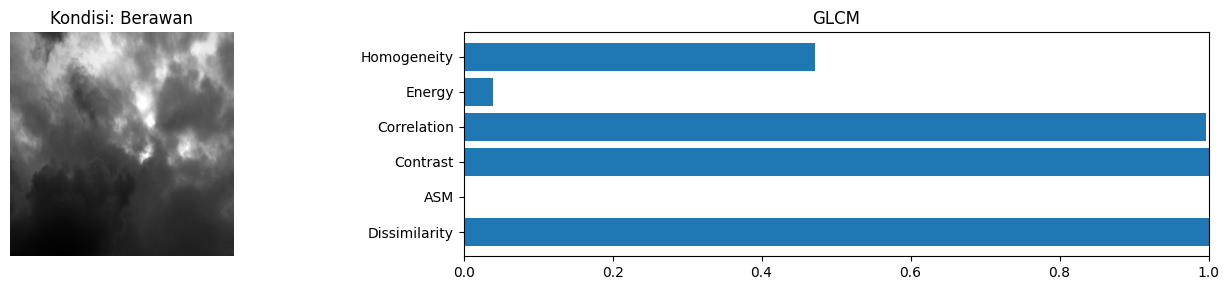

Original Size: (360, 270)
Resized Size: (224, 224)
Original Size: (660, 400)
Resized Size: (224, 224)
Original Size: (2059, 1158)
Resized Size: (224, 224)
Original Size: (600, 443)
Resized Size: (224, 224)
Original Size: (183, 275)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (650, 510)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (666, 338)
Resized Size: (224, 224)
Original Size: (580, 370)
Resized Size: (224, 224)
Original Size: (620, 376)
Resized Size: (224, 224)
Original Size: (640, 480)
Resized Size: (224, 224)
Original Size: (759, 422)
Resized Size: (224, 224)
Original Size: (674, 441)
Resized Size: (224, 224)
Original Size: (283, 178)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (1024, 683)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (370, 305)
Resized Size: (224, 224)
Original Size: (1023, 742)
R

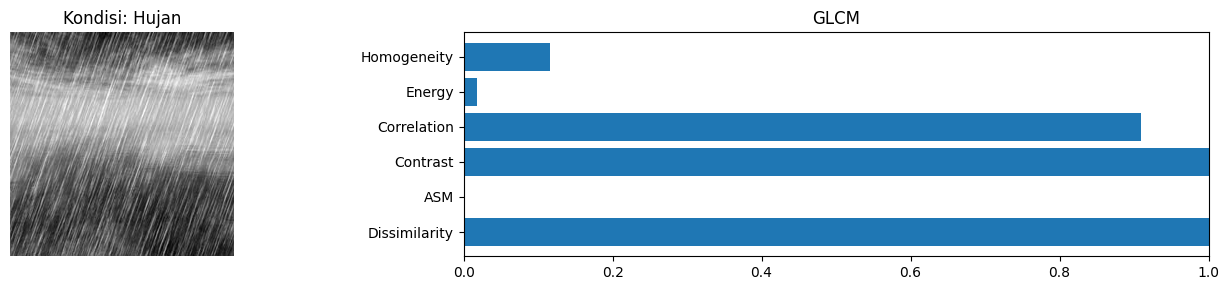

Original Size: (1920, 1080)
Resized Size: (224, 224)
Original Size: (168, 300)
Resized Size: (224, 224)
Original Size: (480, 640)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (688, 456)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (644, 402)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (274, 184)
Resized Size: (224, 224)
Original Size: (183, 275)
Resized Size: (224, 224)
Original Size: (278, 181)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (691, 461)
Resized Size: (224, 224)
Original Size: (1920, 1200)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (550, 413)
R

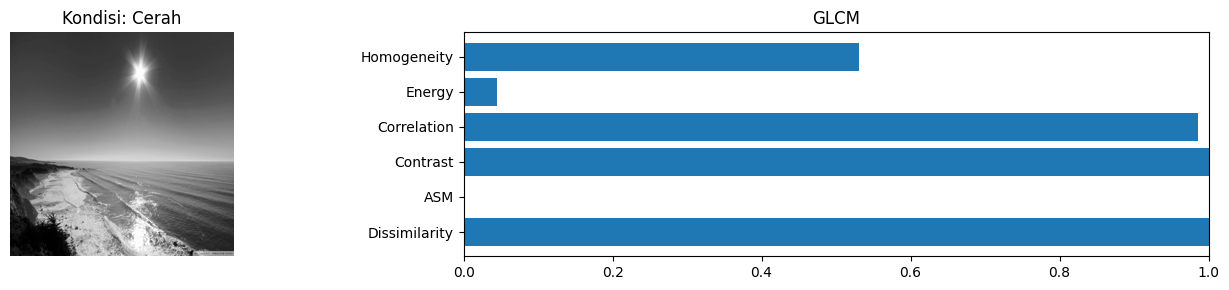

Original Size: (750, 500)
Resized Size: (224, 224)
Original Size: (2304, 1728)
Resized Size: (224, 224)
Original Size: (360, 240)
Resized Size: (224, 224)
Original Size: (620, 400)
Resized Size: (224, 224)
Original Size: (240, 160)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (376, 250)
Resized Size: (224, 224)
Original Size: (660, 495)
Resized Size: (224, 224)
Original Size: (1024, 768)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (790, 555)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (1280, 853)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (225, 225)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (1280, 720)
Resized Size: (224, 224)
Original Size: (299, 169)
Resized Size: (224, 224)
Original Size: (2560, 1600

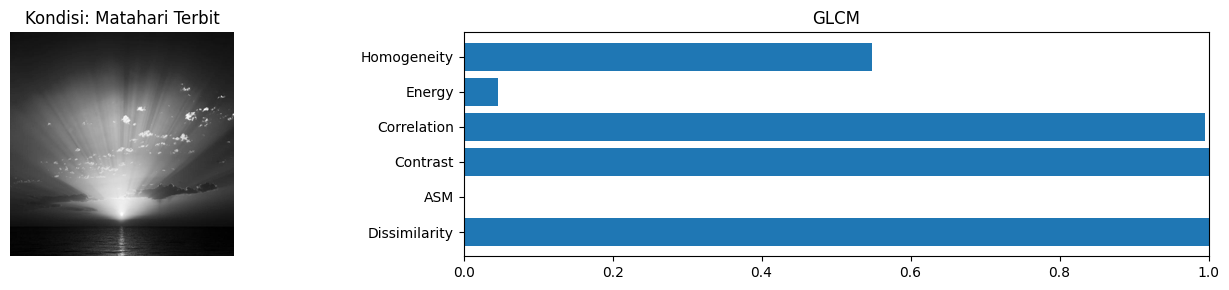

In [169]:
predict_weather('./Weather_Dataset/Cloudy', num_samples=1)
predict_weather('./Weather_Dataset/Rain', num_samples=1)
predict_weather('./Weather_Dataset/Shine', num_samples=1)
predict_weather('./Weather_Dataset/Sunrise', num_samples=1)